In [194]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt


import re
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\s-hir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\s-hir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [195]:
data = pd.read_csv("Dataset.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Group                     1267 non-null   int64 
 1   Sex                       1267 non-null   int64 
 2   Age                       1267 non-null   int64 
 3   Patients number per hour  1267 non-null   int64 
 4   Arrival mode              1267 non-null   int64 
 5   Injury                    1267 non-null   int64 
 6   Chief_complain            1267 non-null   object
 7   Mental                    1267 non-null   int64 
 8   Pain                      1267 non-null   int64 
 9   NRS_pain                  1267 non-null   object
 10  SBP                       1267 non-null   object
 11  DBP                       1267 non-null   object
 12  HR                        1267 non-null   object
 13  RR                        1267 non-null   object
 14  BT                      

In [196]:
# # Sample DataFrame
# data = pd.DataFrame({
#     'Chief_complain': ["Patient has chest pain", "Pt. complaining of fever", "Injured hand", "Back pain"],
#     'Diagnosis in ED': ["Rule out heart attack", "Fever due to infection", "Fractured hand", "Muscle strain"]
# })

# Define a function for text preprocessing
def preprocess_text(text):

    # Remove punctuation
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)

    # Convert text to lowercase
    text = text.lower()

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]

    # Join tokens back into a string
    cleaned_text = " ".join(tokens)

    return cleaned_text

# Apply text preprocessing to the columns
data.Chief_complain = data.Chief_complain.apply(preprocess_text)
# data['Diagnosis in ED'] = data['Diagnosis in ED'].apply(preprocess_text)

# Display the cleaned DataFrame
print(data)








      Group  Sex  Age  Patients number per hour  Arrival mode  Injury  \
0         2    2   71                         3             3       2   
1         1    1   56                        12             3       2   
2         2    1   68                         8             2       2   
3         1    2   71                         8             1       1   
4         1    2   58                         4             3       1   
...     ...  ...  ...                       ...           ...     ...   
1262      2    2   79                         5             2       1   
1263      2    2   81                         2             3       1   
1264      2    2   81                        17             2       1   
1265      2    1   81                         2             2       2   
1266      2    2   87                         8             4       1   

          Chief_complain  Mental  Pain NRS_pain  ...    BT Saturation KTAS_RN  \
0      right ocular pain       1     1    

In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Group                     1267 non-null   int64 
 1   Sex                       1267 non-null   int64 
 2   Age                       1267 non-null   int64 
 3   Patients number per hour  1267 non-null   int64 
 4   Arrival mode              1267 non-null   int64 
 5   Injury                    1267 non-null   int64 
 6   Chief_complain            1267 non-null   object
 7   Mental                    1267 non-null   int64 
 8   Pain                      1267 non-null   int64 
 9   NRS_pain                  1267 non-null   object
 10  SBP                       1267 non-null   object
 11  DBP                       1267 non-null   object
 12  HR                        1267 non-null   object
 13  RR                        1267 non-null   object
 14  BT                      

In [198]:
data = pd.read_csv("Dataset.csv")

# 'Chief_complain', 'Diagnosis in ED',

columns_to_drop = [ 'Chief_complain', 'Diagnosis in ED','Error_group', 'KTAS duration_min', 'mistriage','Group','Patients number per hour','Length of stay_min']

data.drop(columns=columns_to_drop, inplace=True)
data = data.rename(columns={'Disposition':'hospitalized','Arrival mode':'arrivalmode'})
data.columns = [col.lower() for col in data.columns]
data.head()

,sex,age,arrivalmode,injury,mental,pain,nrs_pain,sbp,dbp,hr,rr,bt,saturation,ktas_rn,hospitalized,ktas_expert
0,2,71,3,2,1,1,2,160,100,84,18,36.6,100,2,1,4
1,1,56,3,2,1,1,2,137,75,60,20,36.5,NaN,4,1,5
2,1,68,2,2,1,1,2,130,80,102,20,36.6,98,4,2,5
3,2,71,1,1,1,1,3,139,94,88,20,36.5,NaN,4,1,5
4,2,58,3,1,1,1,3,91,67,93,18,36.5,NaN,4,1,5


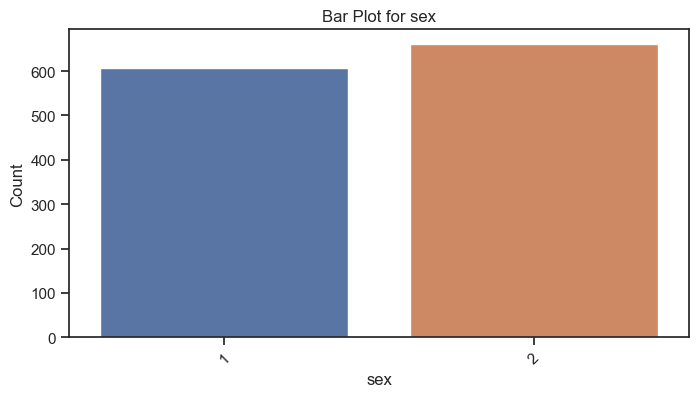

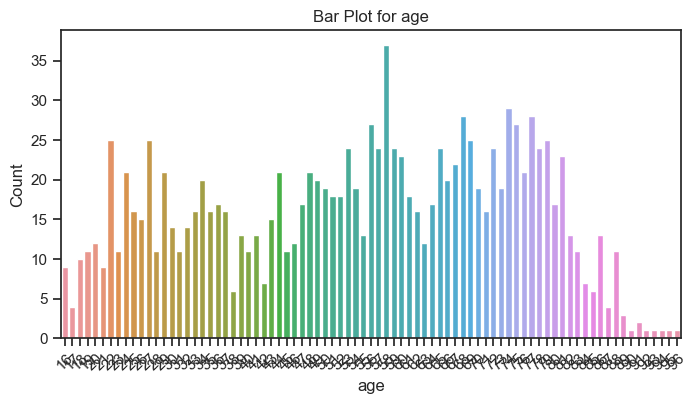

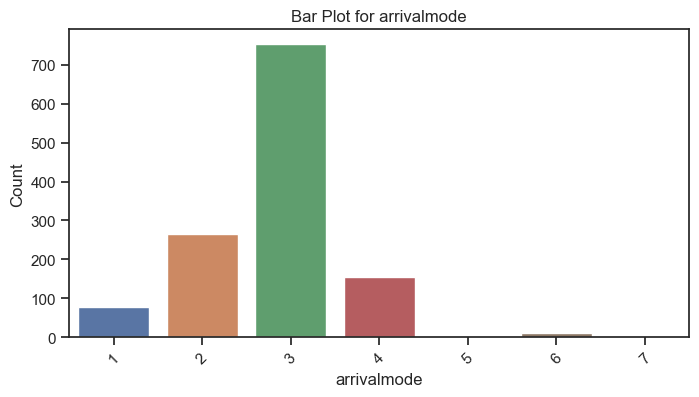

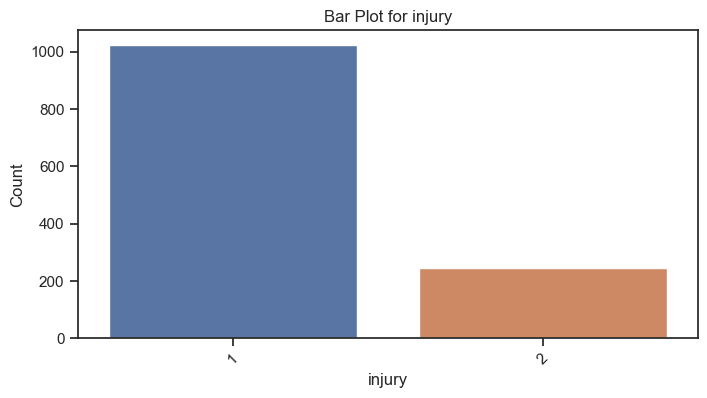

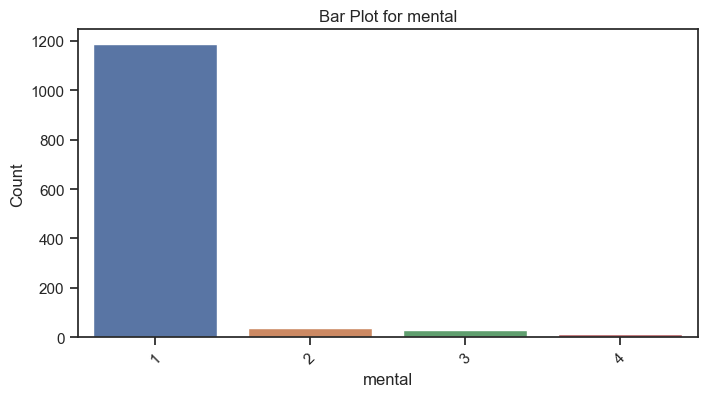

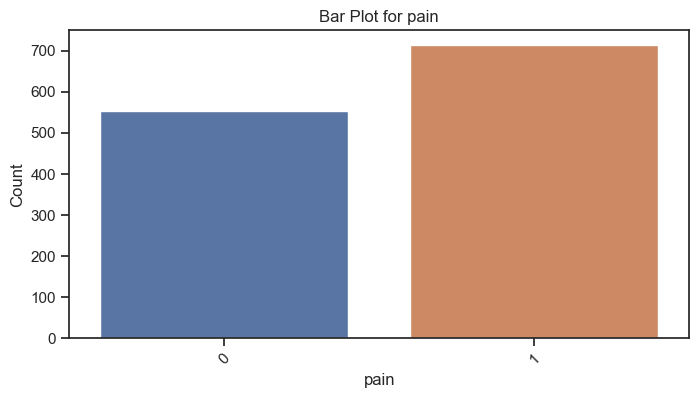

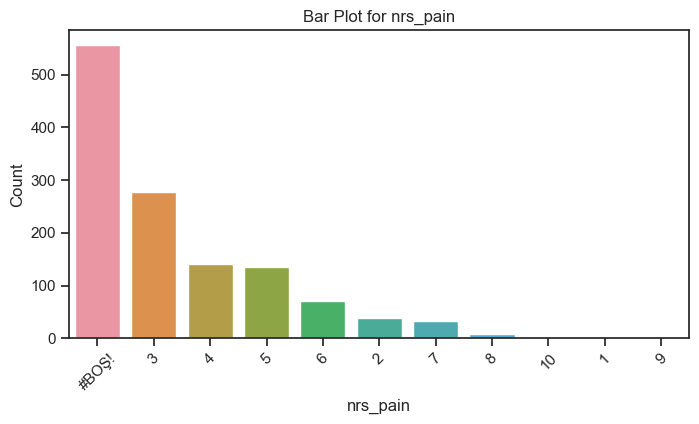

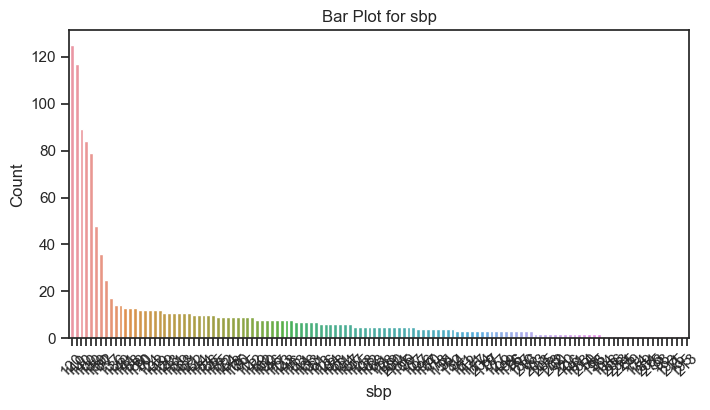

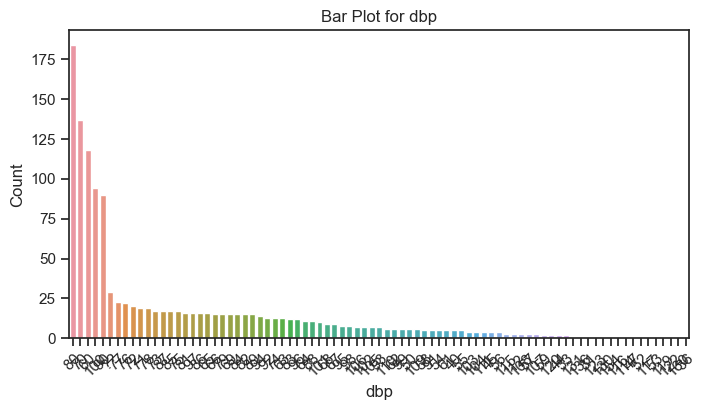

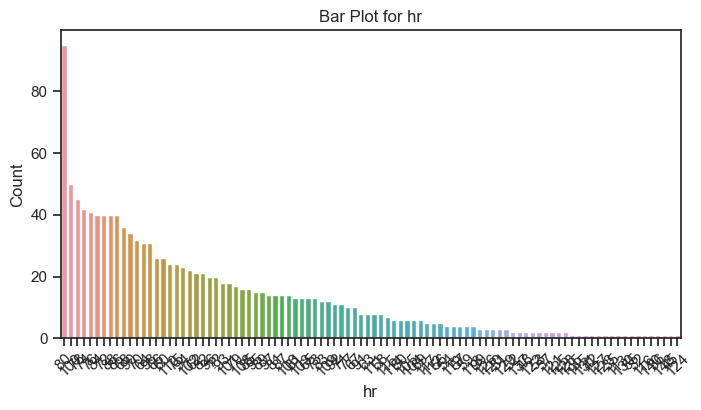

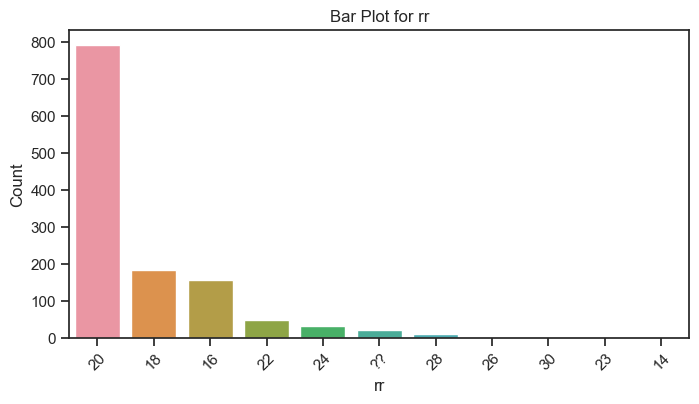

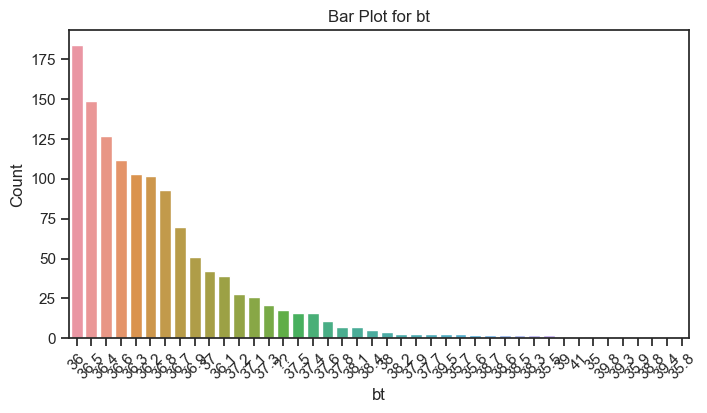

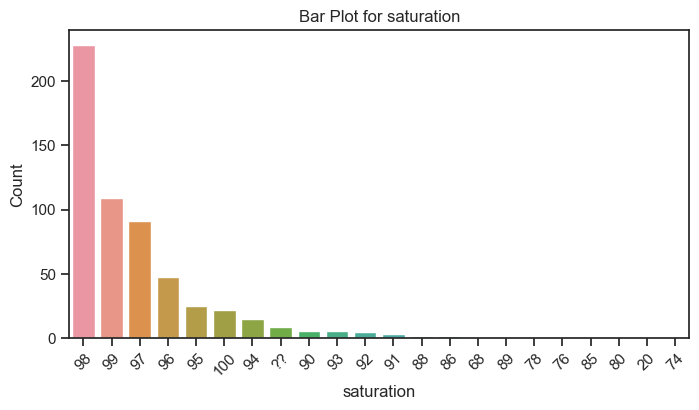

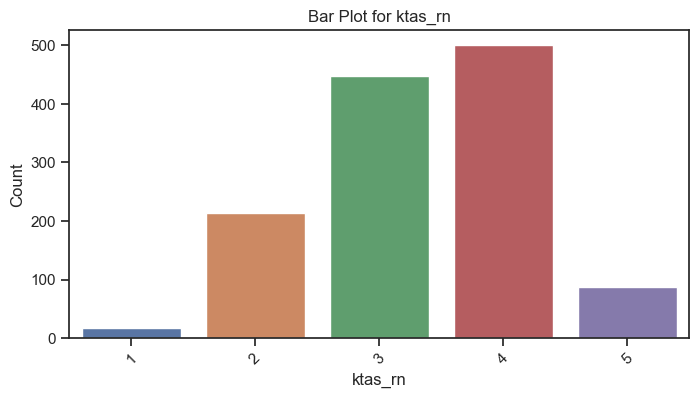

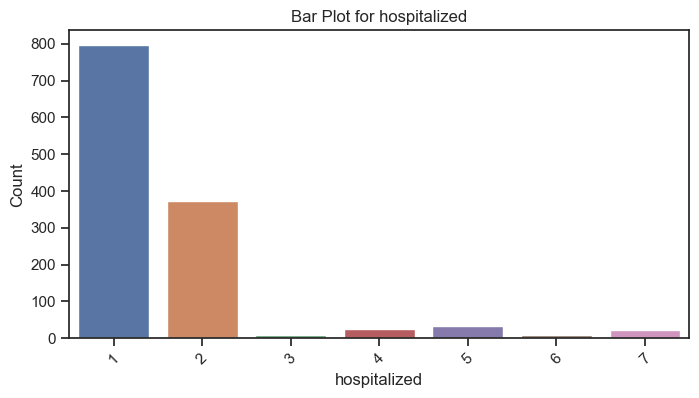

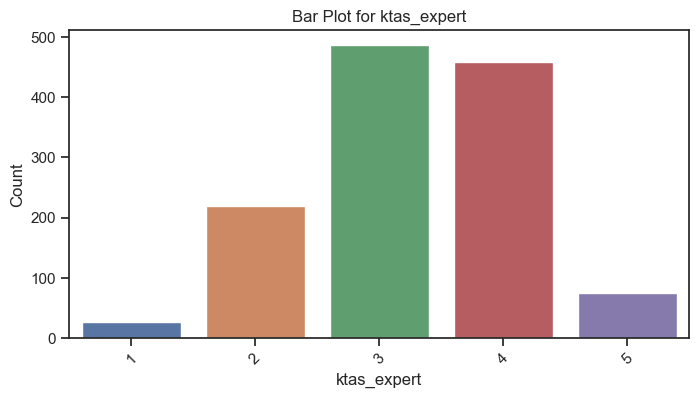

In [199]:
for column in data.columns:
    # Check if the column is non-numeric (categorical or discrete)
    if data[column].dtype == "object" or data[column].dtype == "int64":
        # Count the occurrences of each unique value in the column
        value_counts = data[column].value_counts()

        # Create a bar plot
        plt.figure(figsize=(8, 4))  # Adjust the figure size as needed
        sns.barplot(x=value_counts.index, y=value_counts.values)
        plt.title(f'Bar Plot for {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)  # Rotate x-axis labels if necessary

        # Show the plot
        plt.show()

In [200]:
# # Create a pairplot
# sns.set(style="ticks")
# sns.pairplot(data, diag_kind="kde", hue="hospitalized")

# # Show the plot
# plt.show()

In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sex           1267 non-null   int64 
 1   age           1267 non-null   int64 
 2   arrivalmode   1267 non-null   int64 
 3   injury        1267 non-null   int64 
 4   mental        1267 non-null   int64 
 5   pain          1267 non-null   int64 
 6   nrs_pain      1267 non-null   object
 7   sbp           1267 non-null   object
 8   dbp           1267 non-null   object
 9   hr            1267 non-null   object
 10  rr            1267 non-null   object
 11  bt            1267 non-null   object
 12  saturation    579 non-null    object
 13  ktas_rn       1267 non-null   int64 
 14  hospitalized  1267 non-null   int64 
 15  ktas_expert   1267 non-null   int64 
dtypes: int64(9), object(7)
memory usage: 158.5+ KB


In [202]:

def missingValues(data):
    variables_NA = [col for col in data.columns if data[col].isnull().sum() > 0]
    n_miss = data[variables_NA].isnull().sum().sort_values(ascending=False)
    ratio = (data[variables_NA].isnull().sum() / data.shape[0] * 100).sort_values(ascending=False)
    missing_data = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_data)
    return variables_NA

missingValues(data)

            n_miss  ratio
saturation     688   54.3


['saturation']

<Axes: >

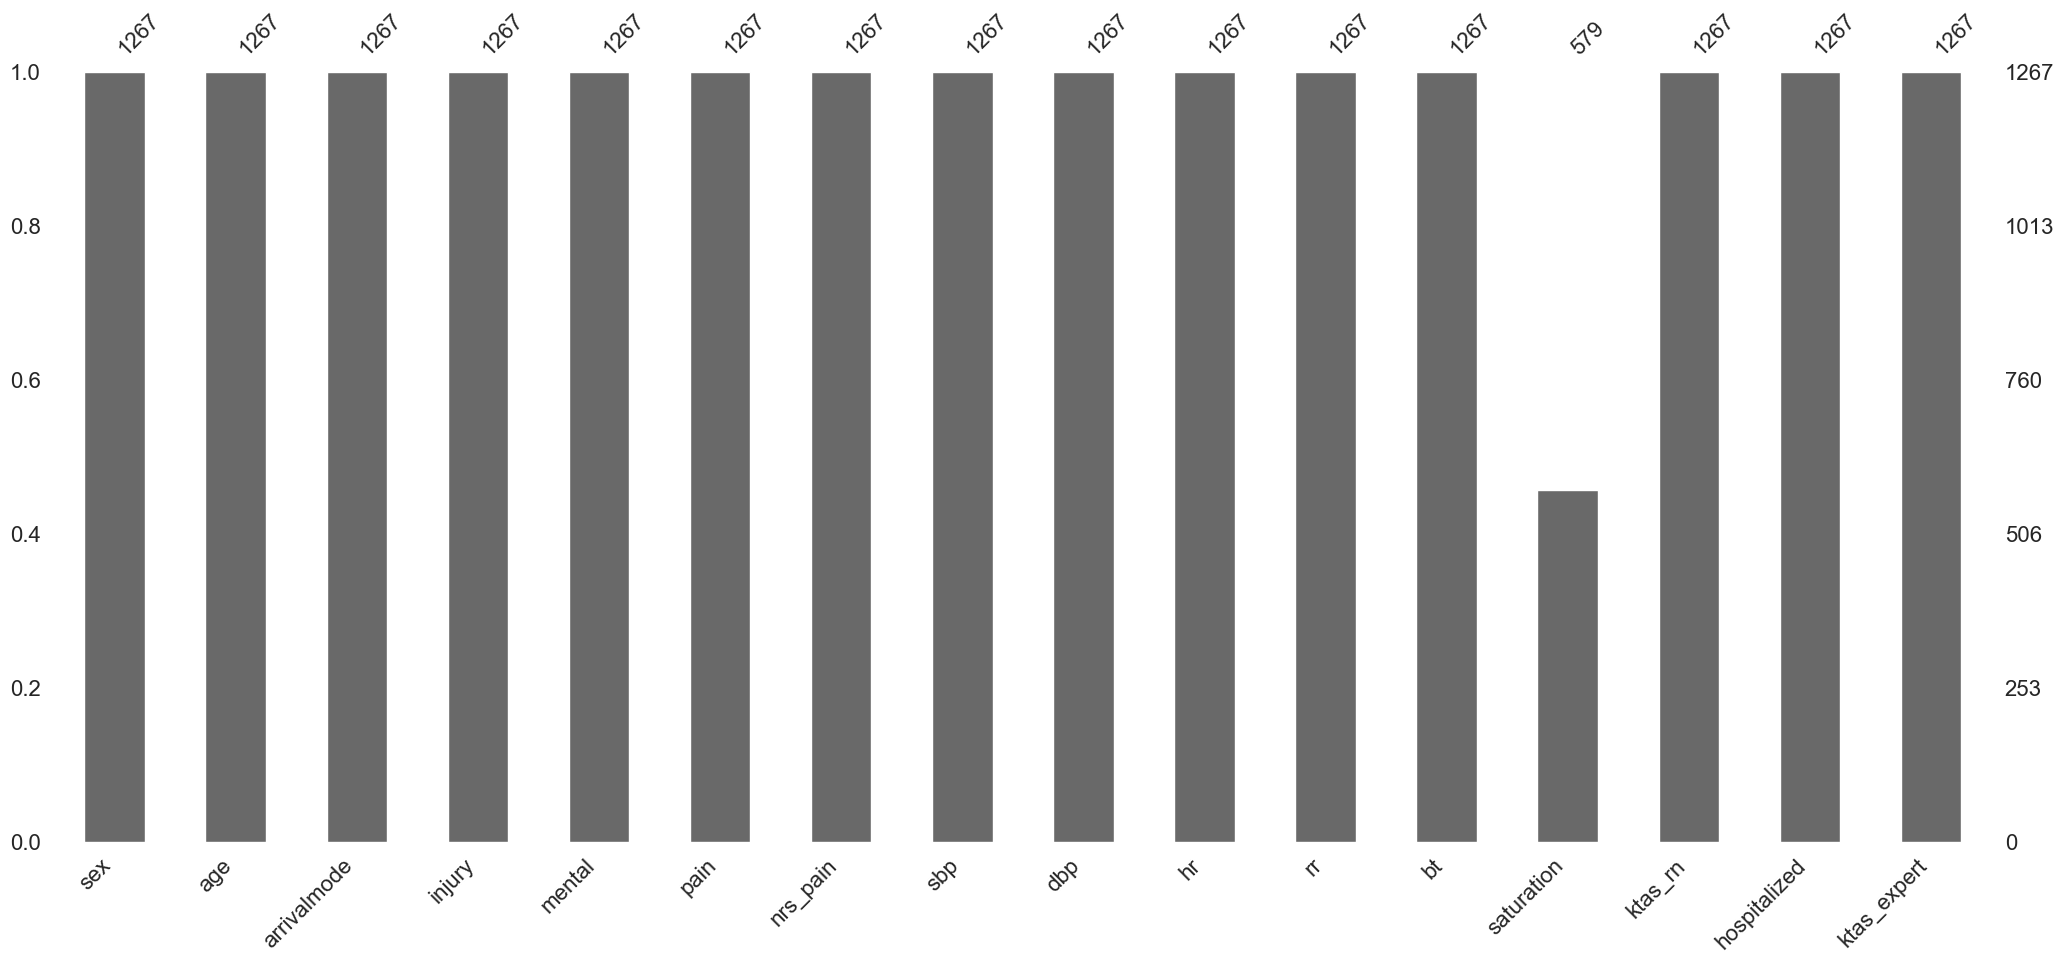

In [203]:
# !pip install missingno
import missingno as misno
misno.bar(data)

In [204]:
data.isnull().values.any()

True

In [205]:
data["saturation"] = data.groupby([ "ktas_expert"])["saturation"].transform(lambda x: x.fillna(x.mode()[0]))
data.isnull().values.any()

False

In [206]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sex           1267 non-null   int64 
 1   age           1267 non-null   int64 
 2   arrivalmode   1267 non-null   int64 
 3   injury        1267 non-null   int64 
 4   mental        1267 non-null   int64 
 5   pain          1267 non-null   int64 
 6   nrs_pain      1267 non-null   object
 7   sbp           1267 non-null   object
 8   dbp           1267 non-null   object
 9   hr            1267 non-null   object
 10  rr            1267 non-null   object
 11  bt            1267 non-null   object
 12  saturation    1267 non-null   object
 13  ktas_rn       1267 non-null   int64 
 14  hospitalized  1267 non-null   int64 
 15  ktas_expert   1267 non-null   int64 
dtypes: int64(9), object(7)
memory usage: 158.5+ KB


In [207]:
data['hospitalized'] = data['hospitalized'].replace({1:0, 2:1, 3:1, 4:0,5:1,6:0,7:1})

data['sex'] = data['sex'].replace({1:0,2:1})
data['injury'] = data['injury'].replace({1:0,2:1})
data.head()

,sex,age,arrivalmode,injury,mental,pain,nrs_pain,sbp,dbp,hr,rr,bt,saturation,ktas_rn,hospitalized,ktas_expert
0,1,71,3,1,1,1,2,160,100,84,18,36.6,100,2,0,4
1,0,56,3,1,1,1,2,137,75,60,20,36.5,98,4,0,5
2,0,68,2,1,1,1,2,130,80,102,20,36.6,98,4,1,5
3,1,71,1,0,1,1,3,139,94,88,20,36.5,98,4,0,5
4,1,58,3,0,1,1,3,91,67,93,18,36.5,98,4,0,5


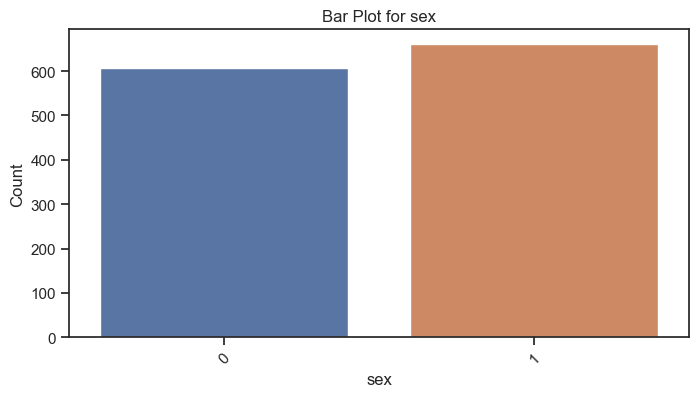

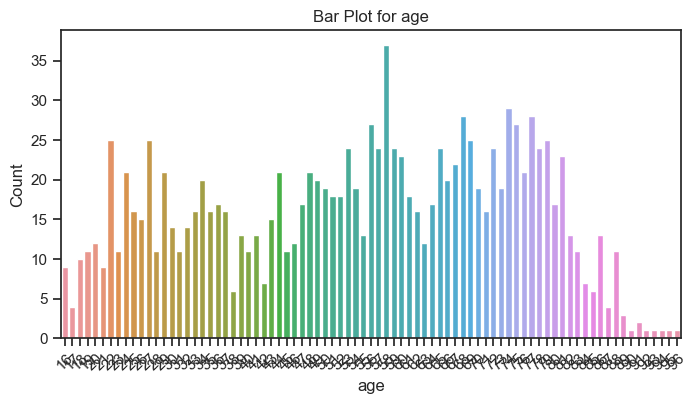

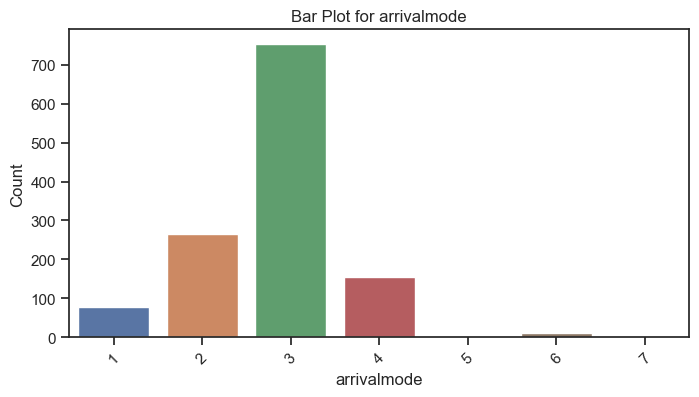

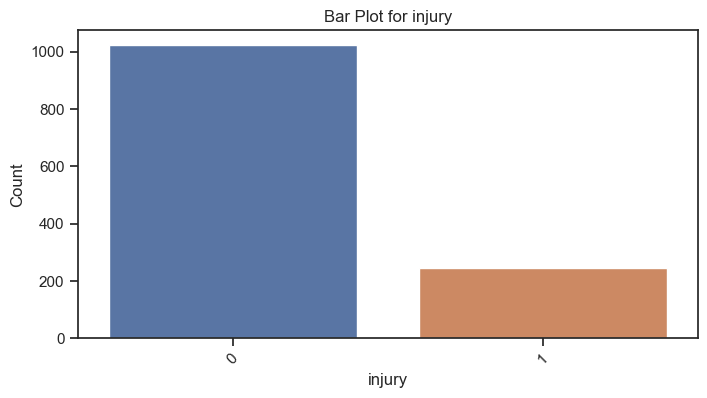

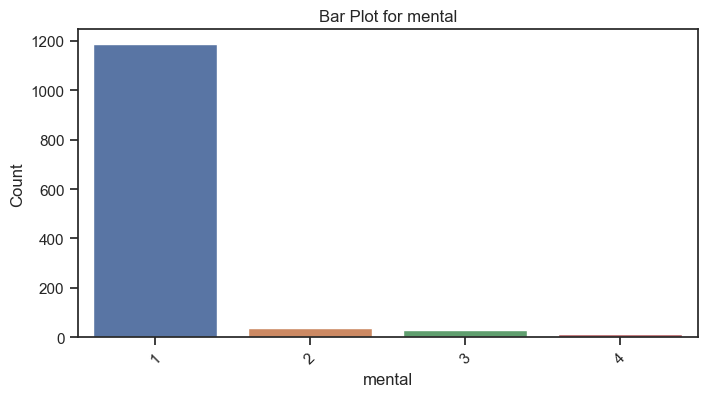

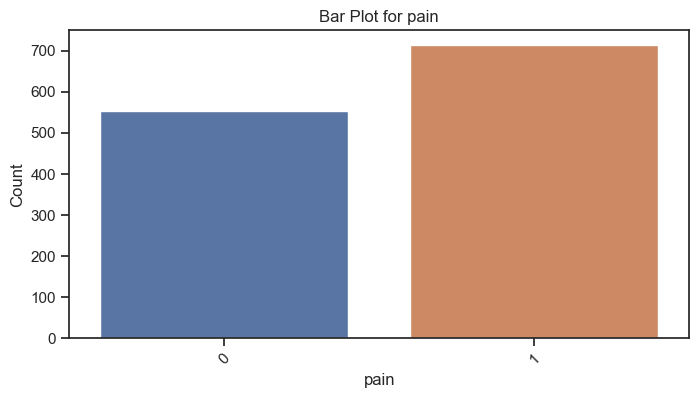

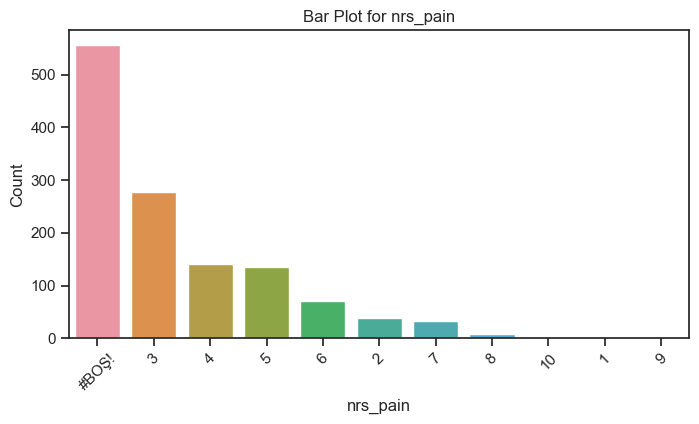

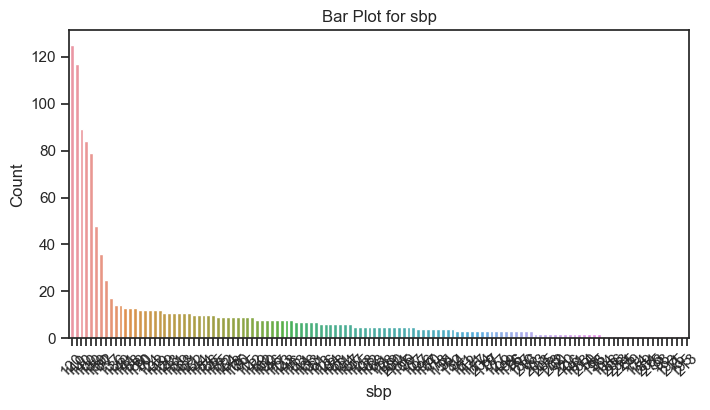

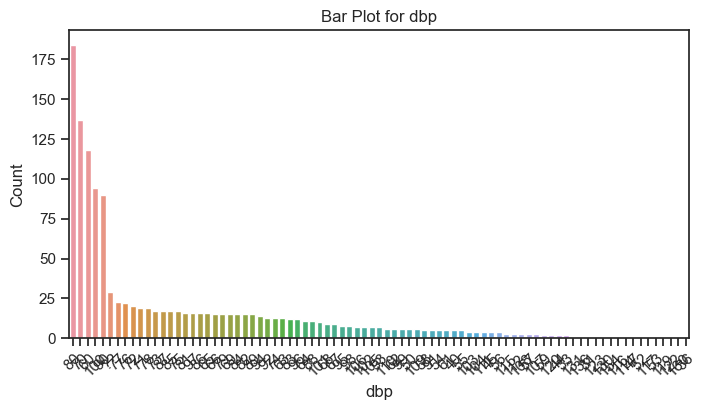

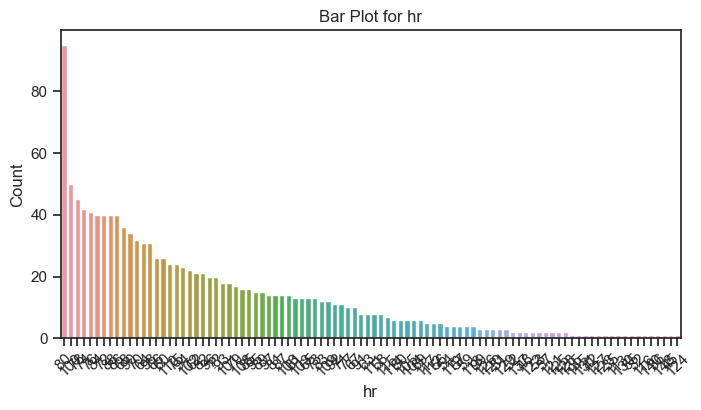

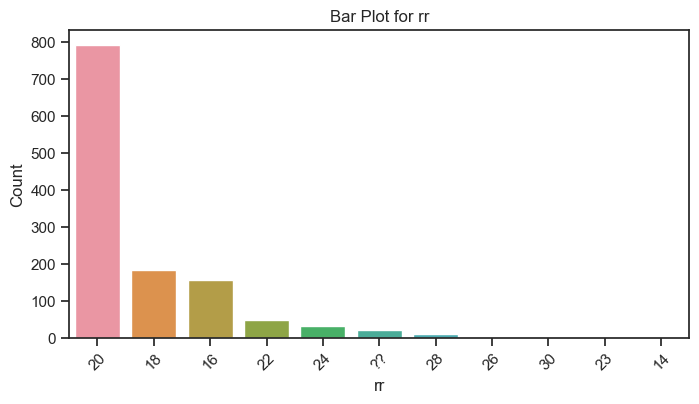

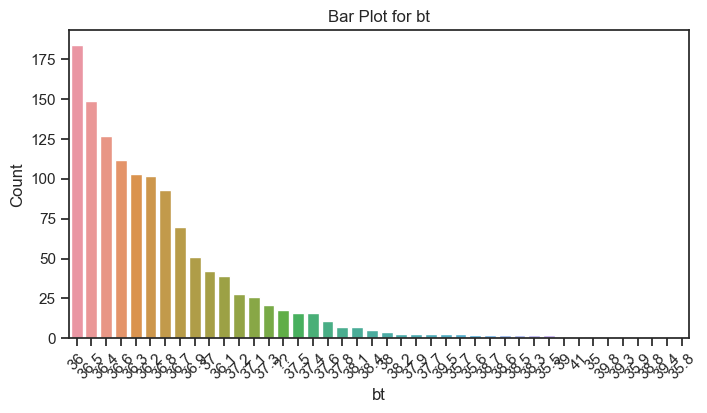

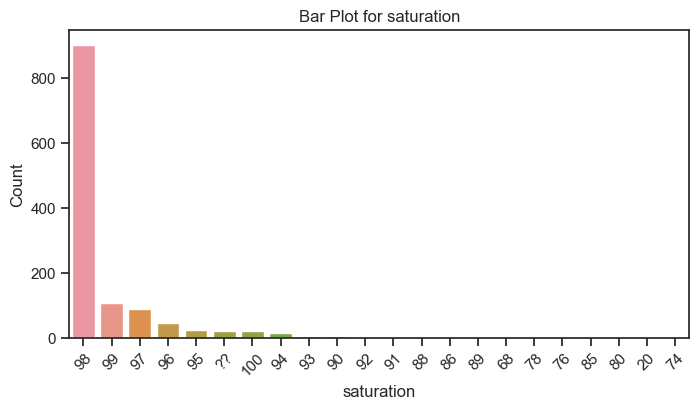

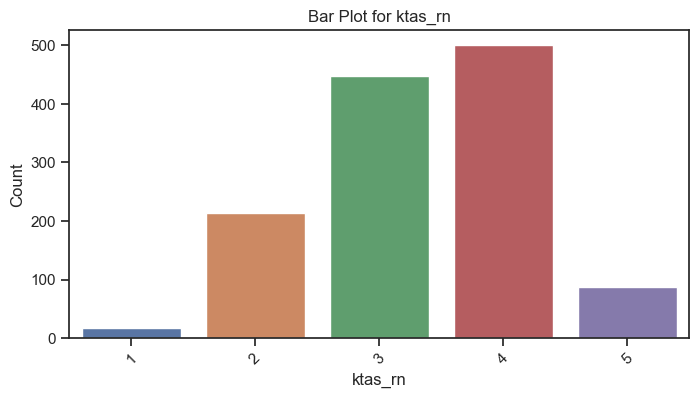

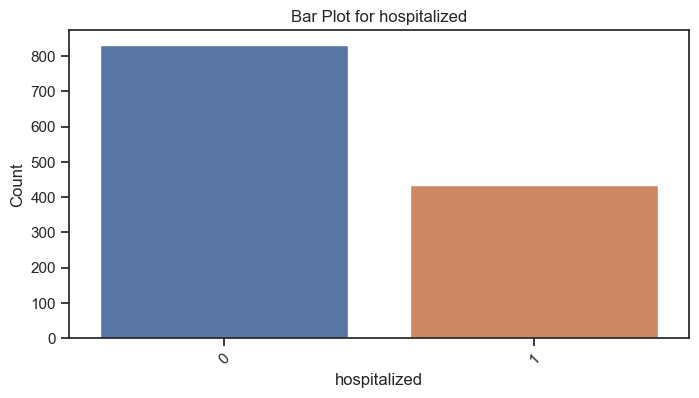

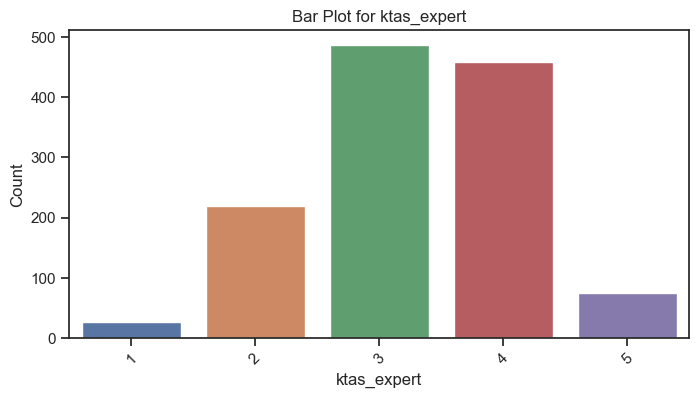

In [208]:
for column in data.columns:
    # Check if the column is non-numeric (categorical or discrete)
    if data[column].dtype == "object" or data[column].dtype == "int64":
        # Count the occurrences of each unique value in the column
        value_counts = data[column].value_counts()

        # Create a bar plot
        plt.figure(figsize=(8, 4))  # Adjust the figure size as needed
        sns.barplot(x=value_counts.index, y=value_counts.values)
        plt.title(f'Bar Plot for {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)  # Rotate x-axis labels if necessary

        # Show the plot
        plt.show()

In [209]:
strings = [x for x in data['sbp'] if type(x) is str]
len(strings)

1267

In [210]:
# Define a list of columns to clean and convert
columns_to_clean = ['nrs_pain', 'sbp', 'dbp', 'hr', 'rr', 'bt', 'saturation']

# Loop through the columns and apply cleaning and conversion
for column in columns_to_clean:
    data[column] = data[column].replace({'#BOŞ!': np.NaN, '??': np.NaN}).astype(float)

# Verify the DataFrame information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sex           1267 non-null   int64  
 1   age           1267 non-null   int64  
 2   arrivalmode   1267 non-null   int64  
 3   injury        1267 non-null   int64  
 4   mental        1267 non-null   int64  
 5   pain          1267 non-null   int64  
 6   nrs_pain      711 non-null    float64
 7   sbp           1242 non-null   float64
 8   dbp           1238 non-null   float64
 9   hr            1247 non-null   float64
 10  rr            1245 non-null   float64
 11  bt            1249 non-null   float64
 12  saturation    1244 non-null   float64
 13  ktas_rn       1267 non-null   int64  
 14  hospitalized  1267 non-null   int64  
 15  ktas_expert   1267 non-null   int64  
dtypes: float64(7), int64(9)
memory usage: 158.5 KB


In [220]:

data = data[[col for col in data.columns if col != 'hospitalized'] + ['hospitalized']]


In [221]:
data.head()

,sex,age,arrivalmode,injury,mental,pain,nrs_pain,sbp,dbp,hr,rr,bt,saturation,ktas_rn,ktas_expert,hospitalized
0,1,71,3,1,1,1,2.0,160.0,100.0,84.0,18.0,36.6,100.0,2,4,0
1,0,56,3,1,1,1,2.0,137.0,75.0,60.0,20.0,36.5,98.0,4,5,0
2,0,68,2,1,1,1,2.0,130.0,80.0,102.0,20.0,36.6,98.0,4,5,1
3,1,71,1,0,1,1,3.0,139.0,94.0,88.0,20.0,36.5,98.0,4,5,0
4,1,58,3,0,1,1,3.0,91.0,67.0,93.0,18.0,36.5,98.0,4,5,0


<Axes: >

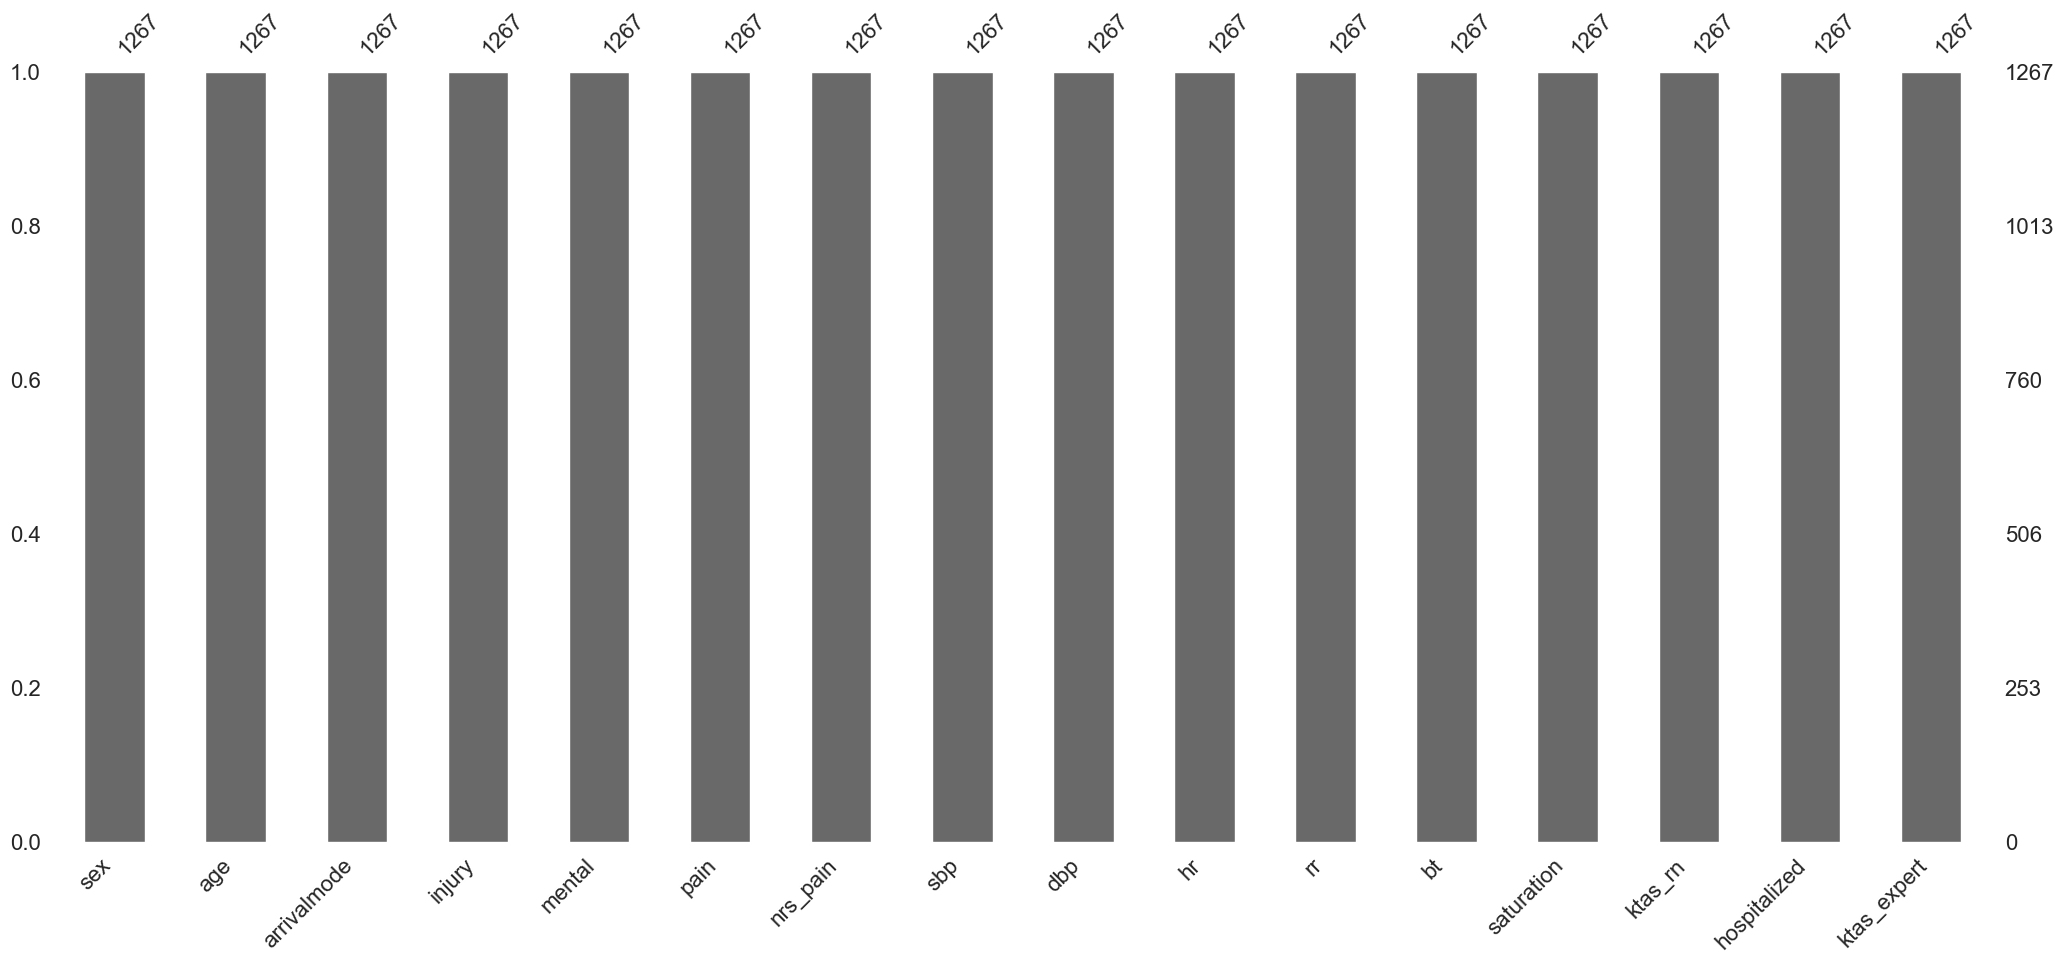

In [212]:
data['nrs_pain'] = data['nrs_pain'].fillna(data['nrs_pain'].mean())
data['sbp'] = data['sbp'].fillna(data['sbp'].median())

data['dbp'] = data['dbp'].fillna(data['dbp'].median())
data['hr'] = data['hr'].fillna(data['hr'].median())
data['rr'] = data['rr'].fillna(data['rr'].median())

data['bt'] = data['bt'].fillna(data['bt'].median())
data['saturation'] = data['saturation'].fillna(data['saturation'].median())
misno.bar(data)

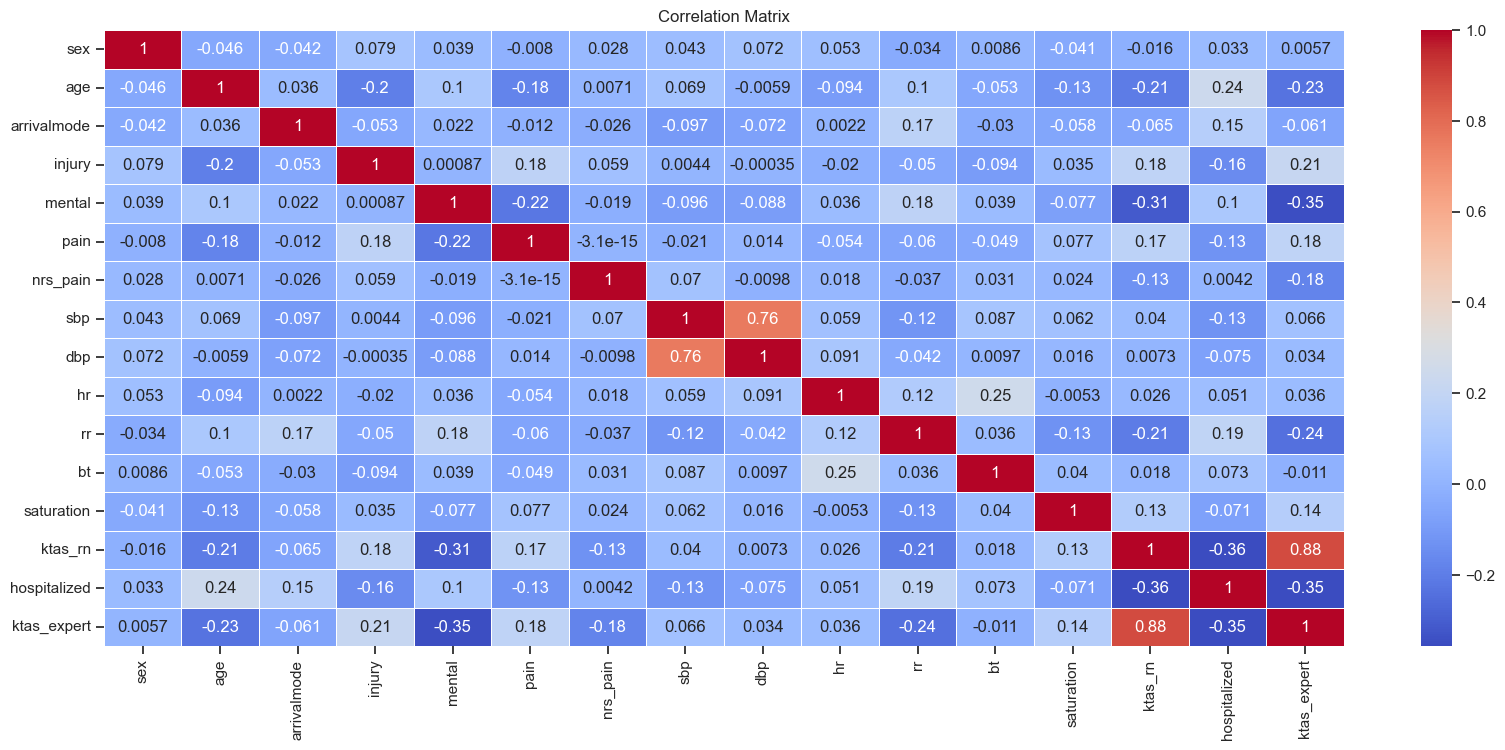

In [213]:
correlation_matrix = data.corr(method='pearson')

plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [214]:
count = data['hospitalized'].value_counts()
print(count)

hospitalized
0    832
1    435
Name: count, dtype: int64


In [215]:
print(data['hospitalized'])

0       0
1       0
2       1
3       0
4       0
       ..
1262    1
1263    0
1264    0
1265    1
1266    1
Name: hospitalized, Length: 1267, dtype: int64


In [216]:
X = data.drop('hospitalized', axis=1)
y = data[['hospitalized']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

NB = GaussianNB().fit(X_train, y_train)


svm = SVC(random_state=357,gamma='auto').fit(X_train, y_train)




C:\Users\s-hir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\s-hir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [217]:
from sklearn.metrics import accuracy_score
models = [
          ("NB", NB),
          ("SVM", svm),
         ]

for name, model in models:
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    msg = "%s: (%f)" % (name, acc)
    print(msg)

NB: (0.696850)
SVM: (0.661417)


In [218]:
import numpy as np
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred_NB = NB.predict(X_test)
y_pred_SVM = svm.predict(X_test)

# Calculate the accuracy of each model
accuracy_NB = accuracy_score(y_test, y_pred_NB)
accuracy_SVM = accuracy_score(y_test, y_pred_SVM)

# Multiply the accuracy by 100 to get the percentage accuracy
percentage_accuracy_NB = accuracy_NB * 100
percentage_accuracy_SVM = accuracy_SVM * 100

# Print the percentage accuracy of each model
print("Percentage accuracy of NB:", percentage_accuracy_NB)
print("Percentage accuracy of SVC:", percentage_accuracy_SVM)


Percentage accuracy of NB: 69.68503937007874
Percentage accuracy of SVC: 66.14173228346458


Test code

In [219]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Load your dataset
# Replace 'your_data.csv' with the actual path to your dataset
data = pd.read_csv('/content/drive/MyDrive/Courses/MastersProject/Dataset/data123.csv')

# Data preprocessing
# Handle missing values (if any)
data = data.dropna()

# Encode categorical variables
categorical_cols = ['Sex', 'Arrival mode', 'Injury', 'Chief_complain', 'Diagnosis in ED']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

data.head()




FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Courses/MastersProject/Dataset/data123.csv'

In [ ]:
data = data.rename(columns={'Disposition':'hospitalized'})
data['hospitalized'] = data['hospitalized'].replace({1:0, 2:1, 3:1, 4:0,5:1,6:0,7:1})
data['nrs_pain'] = data['nrs_pain'].replace({'#BOŞ!':np.NaN})
data['nrs_pain'] = data['nrs_pain'].astype('float')
data['sbp'] = data['sbp'].replace({'??':np.NaN})
data['sbp'] = data['sbp'].astype('float')
data['dbp'] = data['dbp'].replace({'??':np.NaN})
data['dbp'] = data['dbp'].astype('float')
data['hr'] = data['hr'].replace({'??':np.NaN})
data['hr'] = data['hr'].astype('float')
data['rr'] = data['rr'].replace({'??':np.NaN})
data['rr'] = data['rr'].astype('float')
data['bt'] = data['bt'].replace({'??':np.NaN})
data['bt'] = data['bt'].astype('float')
data['saturation'] = data['saturation'].replace({'??':np.NaN})

data=data.drop('KTAS duration_min',axis=1,inplace=False)
data['nrs_pain'] = data['nrs_pain'].fillna(data['nrs_pain'].mean())
data['sbp'] = data['sbp'].fillna(data['sbp'].median())

data['dbp'] = data['dbp'].fillna(data['dbp'].median())
data['hr'] = data['hr'].fillna(data['hr'].median())
data['rr'] = data['rr'].fillna(data['rr'].median())

data['bt'] = data['bt'].fillna(data['bt'].median())
data['saturation'] = data['saturation'].fillna(data['saturation'].median())

# Split data into features (X) and the target variable (y)
X = data.drop(columns=['hospitalized'])
y = data['hospitalized']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model selection
# Support Vector Machine (SVM)
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train, y_train)

# Naive Bayes (Gaussian)
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Model evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, report

svm_accuracy, svm_report = evaluate_model(svm_classifier, X_test, y_test)
rf_accuracy, rf_report = evaluate_model(rf_classifier, X_test, y_test)
nb_accuracy, nb_report = evaluate_model(nb_classifier, X_test, y_test)

print("SVM Accuracy:", svm_accuracy)
print("SVM Classification Report:\n", svm_report)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", rf_report)

print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes Classification Report:\n", nb_report)